In [28]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
# loading the csv file to create the auto_df
auto_df = pd.read_csv('automobile.txt')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Cleansing 
#### I will remove the columns that are redundant and unnecessary for my analysis


In [30]:
auto_df.drop(['symboling','normalized-losses','engine-location','num-of-cylinders','bore','stroke','compression-ratio',
'peak-rpm','wheel-base','length','width','height','engine-type','fuel-system','aspiration','drive-wheels','curb-weight'], inplace=True, axis=1)
auto_df.tail()

,make,fuel-type,num-of-doors,body-style,engine-size,horsepower,city-mpg,highway-mpg,price
200,volvo,gas,four,sedan,141,114,23,28,16845
201,volvo,gas,four,sedan,141,160,19,25,19045
202,volvo,gas,four,sedan,173,134,18,23,21485
203,volvo,diesel,four,sedan,145,106,26,27,22470
204,volvo,gas,four,sedan,141,114,19,25,22625


Most of the columns that have been removed are very technical information that won't provide any insight 

#### Looking for duplicates and remove them

In [31]:
auto_df.drop_duplicates(inplace=True)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 204
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make          204 non-null    object
 1   fuel-type     204 non-null    object
 2   num-of-doors  204 non-null    object
 3   body-style    204 non-null    object
 4   engine-size   204 non-null    int64 
 5   horsepower    204 non-null    object
 6   city-mpg      204 non-null    int64 
 7   highway-mpg   204 non-null    int64 
 8   price         204 non-null    object
dtypes: int64(3), object(6)
memory usage: 15.9+ KB


There was only one duplicate in the dataframe.

#### There are '?' values in the dataframe. 
I will replace them with NaN
then count how many null values are in every column and replace them with the mean or mode

In [32]:
auto_df.replace('?',np.nan,inplace=True)
auto_df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           4
dtype: int64

In [33]:
auto_df.describe()

,engine-size,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000
mean,126.990196,25.230392,30.754902
std,41.728183,6.556376,6.903182
min,61.000000,13.000000,16.000000
25%,97.000000,19.000000,25.000000
50%,120.000000,24.000000,30.000000
75%,142.000000,30.000000,34.500000
max,326.000000,49.000000,54.000000


In [34]:
auto_df['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

In [35]:
auto_df['num-of-doors'].fillna('four',inplace=True)
auto_df['horsepower'].fillna(104, inplace=True)
auto_df['price'].fillna(13207,inplace=True)
auto_df.isnull().sum()

make            0
fuel-type       0
num-of-doors    0
body-style      0
engine-size     0
horsepower      0
city-mpg        0
highway-mpg     0
price           0
dtype: int64

In [36]:
auto_df[:]

,make,fuel-type,num-of-doors,body-style,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,two,convertible,130,111,21,27,13495
1,alfa-romero,gas,two,convertible,130,111,21,27,16500
2,alfa-romero,gas,two,hatchback,152,154,19,26,16500
3,audi,gas,four,sedan,109,102,24,30,13950
4,audi,gas,four,sedan,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,141,114,23,28,16845
201,volvo,gas,four,sedan,141,160,19,25,19045
202,volvo,gas,four,sedan,173,134,18,23,21485
203,volvo,diesel,four,sedan,145,106,26,27,22470


#### Verify that all number columns are in the format int64

In [37]:
auto_df['engine-size'][:1],auto_df['horsepower'][:1], auto_df['city-mpg'][:1],auto_df['highway-mpg'][:1],auto_df['price'][:1]

C:\Users\alexs\AppData\Local\Temp\ipykernel_8584\645328061.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  auto_df['engine-size'][:1],auto_df['horsepower'][:1], auto_df['city-mpg'][:1],auto_df['highway-mpg'][:1],auto_df['price'][:1]


(0    130
 Name: engine-size, dtype: int64,
 0    111
 Name: horsepower, dtype: object,
 0    21
 Name: city-mpg, dtype: int64,
 0    27
 Name: highway-mpg, dtype: int64,
 0    13495
 Name: price, dtype: object)

#### Transform object columns into int64

In [38]:
auto_df['horsepower']=pd.to_numeric(auto_df['horsepower'])
auto_df['price']=pd.to_numeric(auto_df['price'])
auto_df['horsepower'][:1],auto_df['price'][:1]

C:\Users\alexs\AppData\Local\Temp\ipykernel_8584\1401448284.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  auto_df['horsepower'][:1],auto_df['price'][:1]


(0    111
 Name: horsepower, dtype: int64,
 0    13495
 Name: price, dtype: int64)

## EDA

#### Which make is the best-seller?

<AxesSubplot: xlabel='make'>

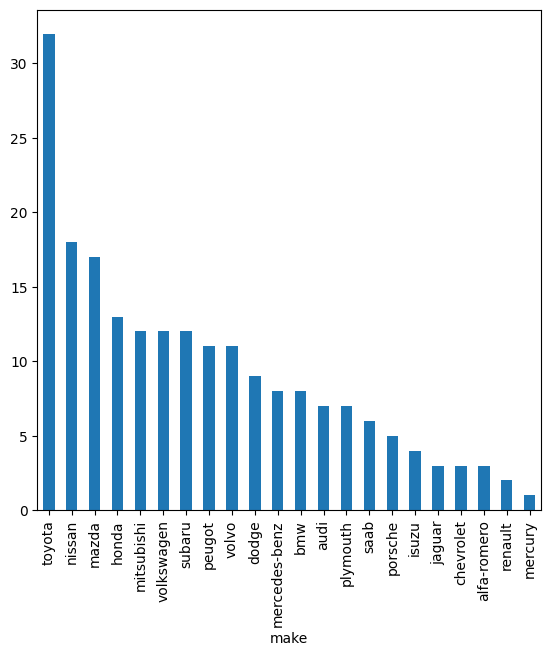

In [39]:
cars_by_make = auto_df.groupby('make')
cars_by_make['make'].count().sort_values(ascending=False).plot(figsize=(6.5,6.5),kind='bar')

Toyota is the best selling car in our dataset, followed by Nissan and Mazda for an all-asian top 3. The least popular make is Mercury.

#### Which manufacturer makes the most expensive cars on average?

<AxesSubplot: xlabel='make'>

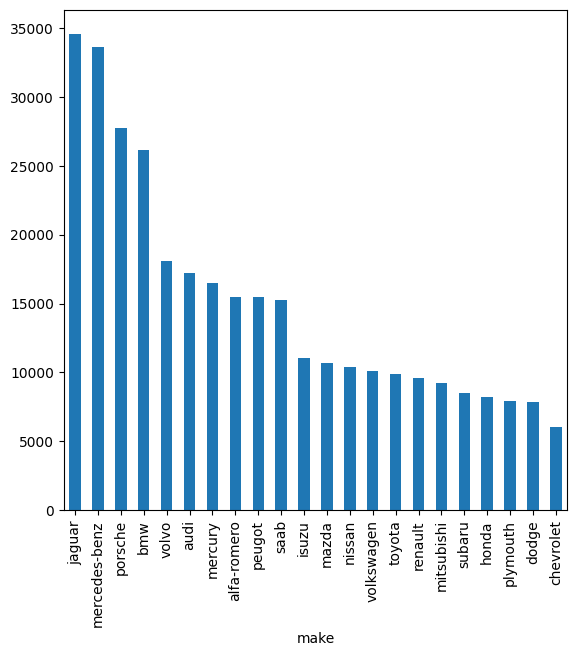

In [40]:

average_price_by_make = cars_by_make['price'].agg(np.mean).sort_values(ascending=False)
average_price_by_make.plot(figsize=(6.5,6.5),kind='bar')

The top 3 most expensive brands are Jaguar, Mercedes-Benz and Porsche. 

#### Which make has the most horsepower on average?

<AxesSubplot: xlabel='make'>

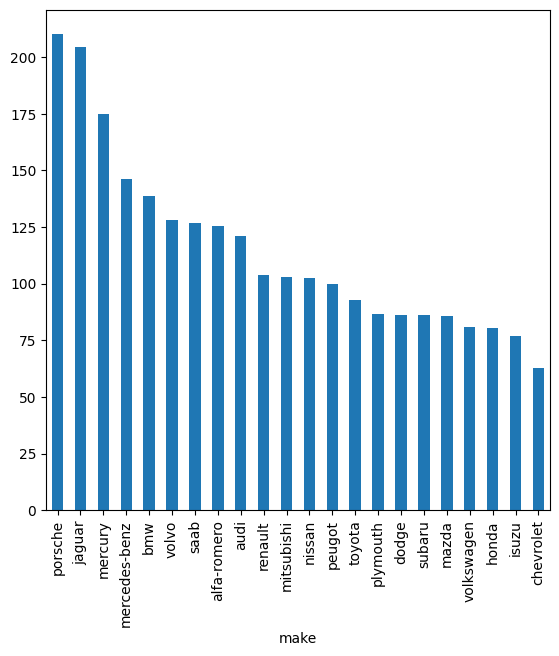

In [41]:
average_horsepower_by_make = cars_by_make['horsepower'].agg(np.mean).sort_values(ascending=False)
average_horsepower_by_make.plot(figsize=(6.5,6.5),kind='bar')

The top 3 most expensive brands are in the top 4 horsepower spots. 

#### What about engine size?

<AxesSubplot: xlabel='make'>

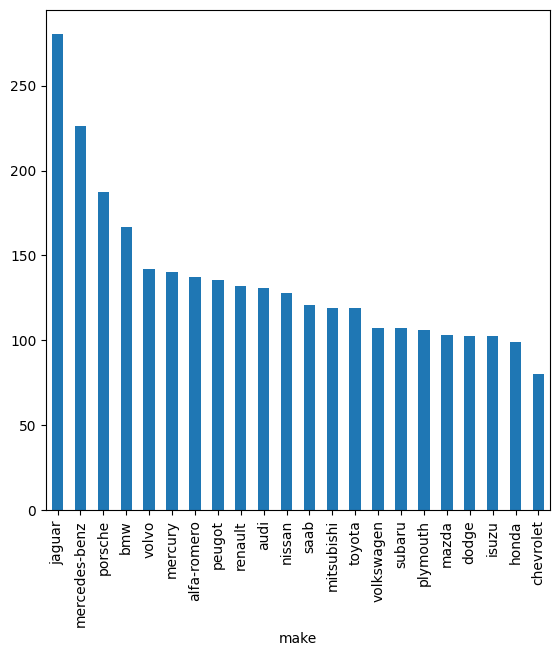

In [42]:
average_engine_by_make = cars_by_make['engine-size'].agg(np.mean).sort_values(ascending=False)
average_engine_by_make.plot(figsize=(6.5,6.5),kind='bar')

Correlation is confirmed once again as the top three engine-size spots are claimed by the top 3 most expensive manufacturers. 
From this we can safely deduce that engine-size and horse power play a huge role in determining the price of a vehicle. 

#### Let's create a scatterplot with all the data in the df regarding horsepower, enginesize and price and find out if there is any correlation. 

Text(0, 0.5, 'HP(blue) and enginesize(orange)')

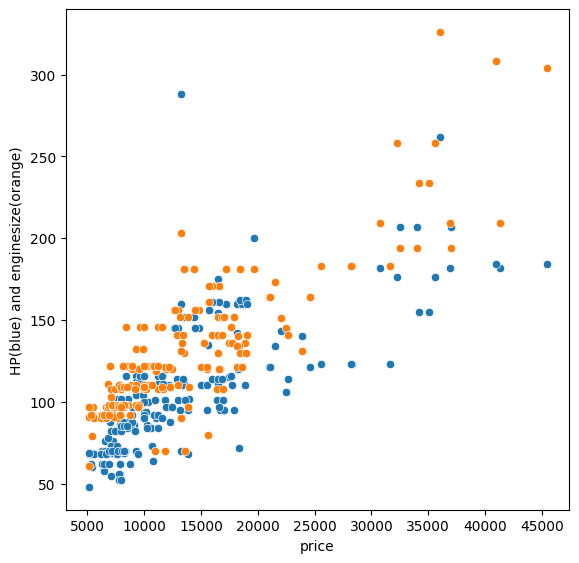

In [43]:
ax = plt.subplots(figsize=(6.5, 6.5))
ax = sns.scatterplot(data= auto_df, x='price', y='horsepower')
ax = sns.scatterplot(data= auto_df, x='price',y='engine-size')
ax.set_ylabel('HP(blue) and enginesize(orange)')


The graph confirms the positive correlation between price and HP and price and enginesize. 

#### What is the average combined-mpg per make?
To simplify I will sum 0.55 of the city mpg and 0.45 of the highway mpg and create an estimate of the combined mpg.

<AxesSubplot: xlabel='make'>

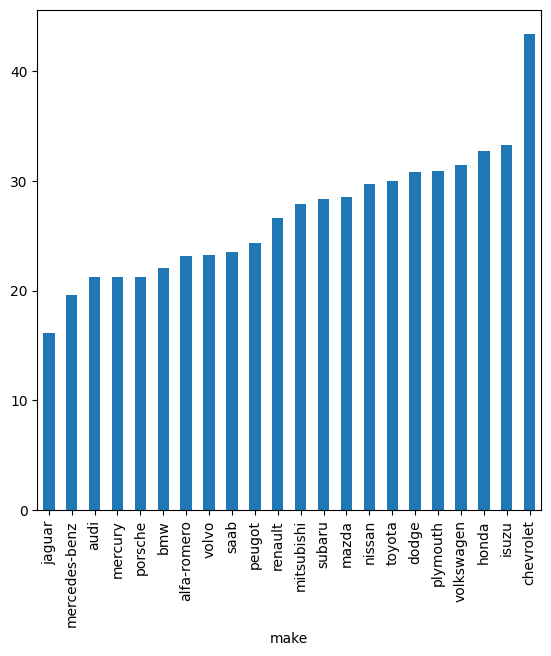

In [44]:
auto_df['combined-mpg'] = 0.55 * auto_df['city-mpg'] + 0.45 * auto_df['highway-mpg']
comb_mpg_by_make = cars_by_make['combined-mpg'].agg(np.mean).sort_values()
comb_mpg_by_make.plot(figsize=(6.5,6.5),kind='bar')

The lower the mpg, the worst the fuel autonomy. The data shows that a car with a big engine and a lot of horsepower is not only very expensive to buy in first place, but also very costly to run. 
The most surprising insight from this chart is chevrolet, which offers the cheapest cars with by far the greatest fuel autonomy. With more than 40 mpg in the combined cycle, its value is 10 points higher than the one in second place. 
So if you want to go fast, be ready to pay the price and get a Jaguar; if you want to go far, buy a Chevrolet. 

#### What are the percentages of gas and diesel vehicles?

<AxesSubplot: ylabel='fuel-type'>

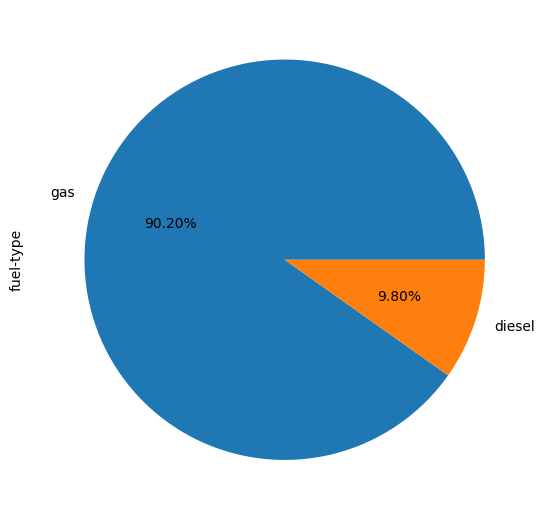

In [45]:
auto_df['fuel-type'].value_counts().plot(figsize=(6.5,6.5),kind='pie',autopct='%.2f%%')

Gas vehicles are an overwhelming majority with more than 90% of the vehicles in the data set.

#### What is the most popular body style?

<AxesSubplot: ylabel='body-style'>

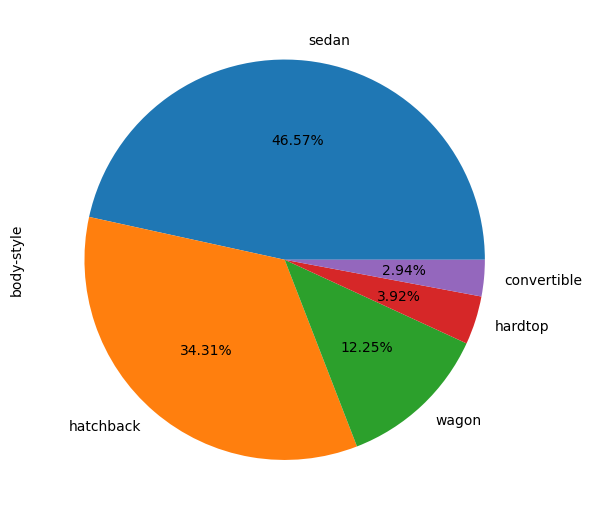

In [46]:
auto_df['body-style'].value_counts().plot(figsize=(6.5,6.5),kind='pie',autopct='%.2f%%')

The sedan body type accounts for almost half the cars.

#### What about the number of doors?

<AxesSubplot: ylabel='num-of-doors'>

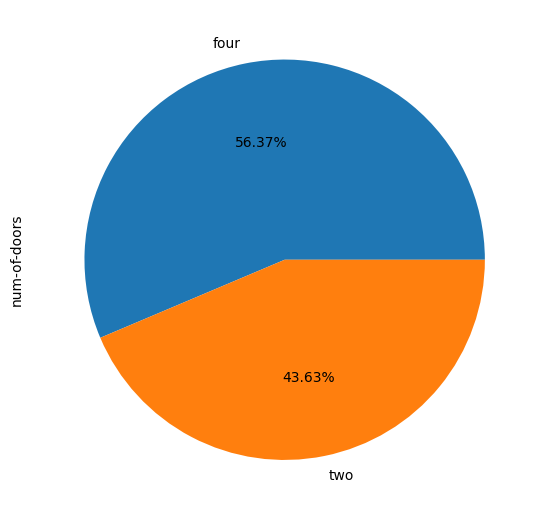

In [47]:
auto_df['num-of-doors'].value_counts().plot(figsize=(6.5,6.5),kind='pie',autopct='%.2f%%')

I was suprised to see that the number of doors is almost equally divided. 
I always had the impression that the 4 doors are way more popular, but then again this dataset is not necessarily representative of the entire population. 